In [22]:
# import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install torch
!pip install matplotlib


In [ ]:
# read file csv
import pandas as pd
weather_df = pd.read_csv("/content/drive/MyDrive/historical_weather_data.csv")


In [ ]:
weather_df.head()

,city,date,temp,humidity,rainfall,wind_speed,uv_index,sunrise,sunset,moonrise,moonset,moon_phase,illumination
0,Hanoi,01/01/2024,22.5,72,0.08,18.7,6.0,06:33 AM,05:26 PM,10:03 PM,10:16 AM,Waning Gibbous,80
1,Ho Chi Minh City,01/01/2024,28.3,66,0.00,17.3,7.0,06:11 AM,05:42 PM,10:07 PM,10:03 AM,Waning Gibbous,80
2,Da Nang,01/01/2024,21.4,92,1.22,8.6,5.0,06:27 AM,05:32 PM,10:05 PM,10:12 AM,Waning Gibbous,80
3,Hai Phong,01/01/2024,21.9,72,0.00,20.5,6.0,06:30 AM,05:23 PM,10:00 PM,10:12 AM,Waning Gibbous,80
4,Can Tho,01/01/2024,27.2,74,0.02,15.5,7.0,06:13 AM,05:47 PM,10:11 PM,10:06 AM,Waning Gibbous,80


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21573 entries, 0 to 21572
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          21573 non-null  object 
 1   date          21573 non-null  object 
 2   temp          21573 non-null  float64
 3   humidity      21573 non-null  int64  
 4   rainfall      21573 non-null  float64
 5   wind_speed    21573 non-null  float64
 6   uv_index      21573 non-null  float64
 7   sunrise       21573 non-null  object 
 8   sunset        21573 non-null  object 
 9   moonrise      21573 non-null  object 
 10  moonset       21573 non-null  object 
 11  moon_phase    21573 non-null  object 
 12  illumination  21573 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 2.1+ MB


In [ ]:
# nan
weather_df.isnull().sum()

,0
city,0
date,0
temp,0
humidity,0
rainfall,0
wind_speed,0
uv_index,0
sunrise,0
sunset,0
moonrise,0


In [ ]:
weather_df.describe()

,temp,humidity,rainfall,wind_speed,uv_index,illumination
count,21573.000000,21573.000000,21573.00000,21573.000000,21573.000000,21573.000000
mean,24.894113,76.751449,5.27828,15.581495,6.528995,49.132573
std,5.112198,12.349962,11.43193,6.580803,1.369164,34.919626
min,-9.600000,12.000000,0.00000,1.400000,1.000000,0.000000
25%,22.700000,70.000000,0.04000,10.800000,6.000000,15.000000
50%,26.200000,79.000000,1.19000,15.100000,7.000000,49.000000
75%,28.200000,85.000000,6.54000,19.800000,7.000000,84.000000
max,35.400000,100.000000,309.27000,55.800000,10.000000,100.000000


In [ ]:
# Làm sạch dữ liệu (loại bỏ khoảng trắng thừa)
weather_df['sunrise'] = weather_df['sunrise'].str.strip()
weather_df['sunset'] = weather_df['sunset'].str.strip()
weather_df['moonrise'] = weather_df['moonrise'].str.strip()
weather_df['moonset'] = weather_df['moonset'].str.strip()

# Chuyển đổi sang kiểu datetime (chỉ lấy thời gian)
weather_df['sunrise'] = pd.to_datetime(weather_df['sunrise'], format='%I:%M %p', errors='coerce').dt.time
weather_df['sunset'] = pd.to_datetime(weather_df['sunset'], format='%I:%M %p', errors='coerce').dt.time
weather_df['moonrise'] = pd.to_datetime(weather_df['moonrise'], format='%I:%M %p', errors='coerce').dt.time
weather_df['moonset'] = pd.to_datetime(weather_df['moonset'], format='%I:%M %p', errors='coerce').dt.time

# Kiểm tra kết quả
print(weather_df[['sunrise', 'sunset', 'moonrise', 'moonset']].head(10))


    sunrise    sunset  moonrise   moonset
0  06:33:00  17:26:00  22:03:00  10:16:00
1  06:11:00  17:42:00  22:07:00  10:03:00
2  06:27:00  17:32:00  22:05:00  10:12:00
3  06:30:00  17:23:00  22:00:00  10:12:00
4  06:13:00  17:47:00  22:11:00  10:06:00
5  06:04:00  17:29:00  21:56:00  09:54:00
6  06:13:00  17:26:00  21:57:00  10:01:00
7  06:40:00  17:26:00  22:05:00  10:21:00
8  06:35:00  17:22:00  22:00:00  10:16:00
9  06:46:00  17:35:00  22:13:00  10:28:00


In [ ]:
# Chuyển cột date sang kiểu datetime
weather_df['date'] = pd.to_datetime(weather_df['date'], format='%d/%m/%Y', errors='coerce')

# Kiểm tra kết quả
print(weather_df[['date']].head(10))


        date
0 2024-01-01
1 2024-01-01
2 2024-01-01
3 2024-01-01
4 2024-01-01
5 2024-01-01
6 2024-01-01
7 2024-01-01
8 2024-01-01
9 2024-01-01


In [ ]:
# Tạo từ điển ánh xạ các giá trị trong cột 'moon_phase' thành số
moon_phase_map = {
    'Waning Gibbous': 1,
    'Last Quarter': 2,
    'Waning Crescent': 3,
    'New Moon': 4,
    'Waxing Crescent': 5,
    'First Quarter': 6,
    'Waxing Gibbous': 7,
    'Full Moon': 8
}

# Áp dụng ánh xạ vào cột 'moon_phase'
weather_df['moon_phase'] = weather_df['moon_phase'].map(moon_phase_map)



In [ ]:
# Chuyển các cột 'sunrise', 'sunset', 'moonrise', 'moonset' sang datetime
time_columns = ['sunrise', 'sunset', 'moonrise', 'moonset']
# Hàm để chuyển đổi giờ phút thành số
def time_to_float(time):
    if pd.isna(time):
        return float('nan')  # Trường hợp không có dữ liệu
    return time.hour + time.minute / 60.0

# Áp dụng hàm chuyển đổi cho các cột
for col in time_columns:
    weather_df[col] = weather_df[col].apply(time_to_float)

# Kiểm tra kết quả
print(weather_df[['sunrise', 'sunset', 'moonrise', 'moonset']].head())


    sunrise     sunset   moonrise    moonset
0  6.550000  17.433333  22.050000  10.266667
1  6.183333  17.700000  22.116667  10.050000
2  6.450000  17.533333  22.083333  10.200000
3  6.500000  17.383333  22.000000  10.200000
4  6.216667  17.783333  22.183333  10.100000


In [ ]:
# set nan value is the mean
weather_df['moonrise'].fillna(weather_df['moonrise'].mean(), inplace=True)
weather_df['moonset'].fillna(weather_df['moonset'].mean(), inplace=True)

<ipython-input-11-8b122473ddfe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_df['moonrise'].fillna(weather_df['moonrise'].mean(), inplace=True)
<ipython-input-11-8b122473ddfe>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
weather_df[['humidity', 'rainfall', 'wind_speed', 'uv_index', 'illumination']] = scaler.fit_transform(
    weather_df[['humidity', 'rainfall', 'wind_speed', 'uv_index', 'illumination']]
)

In [ ]:
# Các thuộc tính bạn muốn tính mối tương quan
selected_columns = ['temp', 'humidity', 'rainfall', 'wind_speed', 'uv_index', 'illumination', 'sunrise', 'sunset', 'moonrise', 'moonset']

# Tính toán ma trận tương quan chỉ giữa các thuộc tính đã chọn
correlation_matrix = weather_df[selected_columns].corr()

# Chỉ lấy mối tương quan với thuộc tính 'temp'
correlation_with_temp = correlation_matrix['temp'].sort_values(ascending=False)
correlation_with_temp


,temp
temp,1.000000
uv_index,0.853502
wind_speed,0.325224
sunset,0.168019
illumination,0.023045
moonrise,0.006461
rainfall,0.000040
moonset,-0.008875
humidity,-0.222607
sunrise,-0.637359


In [ ]:
import pandas as pd

# Giả sử weather_df đã được load và cột 'date' đã được chuyển thành kiểu datetime như đã làm trước đó

# Tách dữ liệu tập test từ ngày 01-12-2024 đến hết
test_df = weather_df[weather_df['date'] >= '2024-12-01']

# Tách phần còn lại (Train + Eval)
train_eval_df = weather_df[weather_df['date'] < '2024-12-01']

# Bạn có thể chia phần còn lại thành Train và Eval theo tỷ lệ mong muốn, ví dụ 80% train, 20% eval
from sklearn.model_selection import train_test_split

train_df, eval_df = train_test_split(train_eval_df, test_size=0.2, shuffle=False)

# In thông tin về kích thước các tập dữ liệu
print(f"Train set size: {train_df.shape}")
print(f"Eval set size: {eval_df.shape}")
print(f"Test set size: {test_df.shape}")


Train set size: (16613, 13)
Eval set size: (4154, 13)
Test set size: (806, 13)


In [ ]:
features = ['humidity', 'rainfall', 'wind_speed', 'uv_index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'illumination']
label = 'temp'

# Tách các thuộc tính đầu vào và nhãn cho mỗi tập dữ liệu
X_train = train_df[features]
y_train = train_df[label]

X_eval = eval_df[features]
y_eval = eval_df[label]

X_test = test_df[features]
y_test = test_df[label]

# In thông tin về kích thước của các tập dữ liệu
print(f"X_train size: {X_train.shape}, y_train size: {y_train.shape}")
print(f"X_eval size: {X_eval.shape}, y_eval size: {y_eval.shape}")
print(f"X_test size: {X_test.shape}, y_test size: {y_test.shape}")

X_train size: (16613, 10), y_train size: (16613,)
X_eval size: (4154, 10), y_eval size: (4154,)
X_test size: (806, 10), y_test size: (806,)


In [ ]:
import torch

# Chuyển dữ liệu đã được chuẩn hóa thành Tensor
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  # reshape cho LSTM

X_eval_tensor = torch.tensor(X_eval.values, dtype=torch.float32)
y_eval_tensor = torch.tensor(y_eval.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# In thông tin dữ liệu Tensor
print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"X_eval_tensor shape: {X_eval_tensor.shape}")
print(f"y_eval_tensor shape: {y_eval_tensor.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}")
print(f"y_test_tensor shape: {y_test_tensor.shape}")


X_train_tensor shape: torch.Size([16613, 10])
y_train_tensor shape: torch.Size([16613, 1])
X_eval_tensor shape: torch.Size([4154, 10])
y_eval_tensor shape: torch.Size([4154, 1])
X_test_tensor shape: torch.Size([806, 10])
y_test_tensor shape: torch.Size([806, 1])


In [ ]:
!pip install tensorflow

In [ ]:
# check verison
import tensorflow as tf
print(tf.__version__)

2.17.1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - loss: 203.8358 - val_loss: 19.0537
Epoch 2/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 30.2939 - val_loss: 10.9775
Epoch 3/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 11.7754 - val_loss: 3.6380
Epoch 4/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 8.0626 - val_loss: 4.0611
Epoch 5/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 7.6743 - val_loss: 4.2099
Epoch 6/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 7.4268 - val_loss: 3.6793
Epoch 7/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 7.3854 - val_loss: 3.8369
Epoch 8/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 7.1063 - val_loss: 4.3124
Epoch 9/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 7.0421 - val_loss: 3.6764
Epoch 10/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 6.8553 - val_loss: 3.5206
Epoch 11/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 6.7227 - val_loss: 3.7207
Epoch 12/50
520/520 ━━━━━━━━━━━

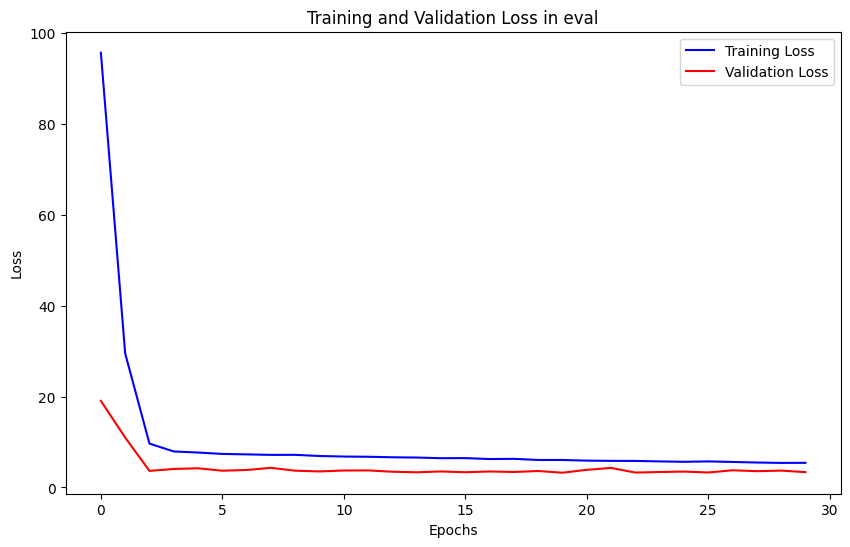

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Xây dựng mô hình LSTM
model = Sequential()

# LSTM layer với 50 units, return_sequences=True để trả lại chuỗi cho lớp tiếp theo
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_tensor.shape[1], 1)))
model.add(Dropout(0.2))

# LSTM layer thứ hai với 50 units, không trả lại chuỗi vì đây là lớp cuối cùng
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Lớp Dense với 1 unit cho đầu ra (dự đoán nhiệt độ)
model.add(Dense(units=1))

# Biên dịch mô hình với Adam optimizer và loss function là MSE
model.compile(optimizer='adam', loss='mean_squared_error')

# Tạo early stopping để ngừng huấn luyện khi không có cải thiện trong 10 epoch
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình
history = model.fit(
    X_train_tensor, y_train_tensor,
    epochs=50,
    batch_size=32,
    validation_data=(X_eval_tensor, y_eval_tensor),
    callbacks=[early_stopping]
)

# Dự đoán trên dữ liệu test
y_pred = model.predict(X_eval_tensor)

# Đánh giá mô hình
mse = mean_squared_error(y_eval_tensor, y_pred)
print(f'Mean Squared Error: {mse}')

# Vẽ biểu đồ Loss và Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss in eval')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# save model
model.save('weather_prediction_model.h5')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


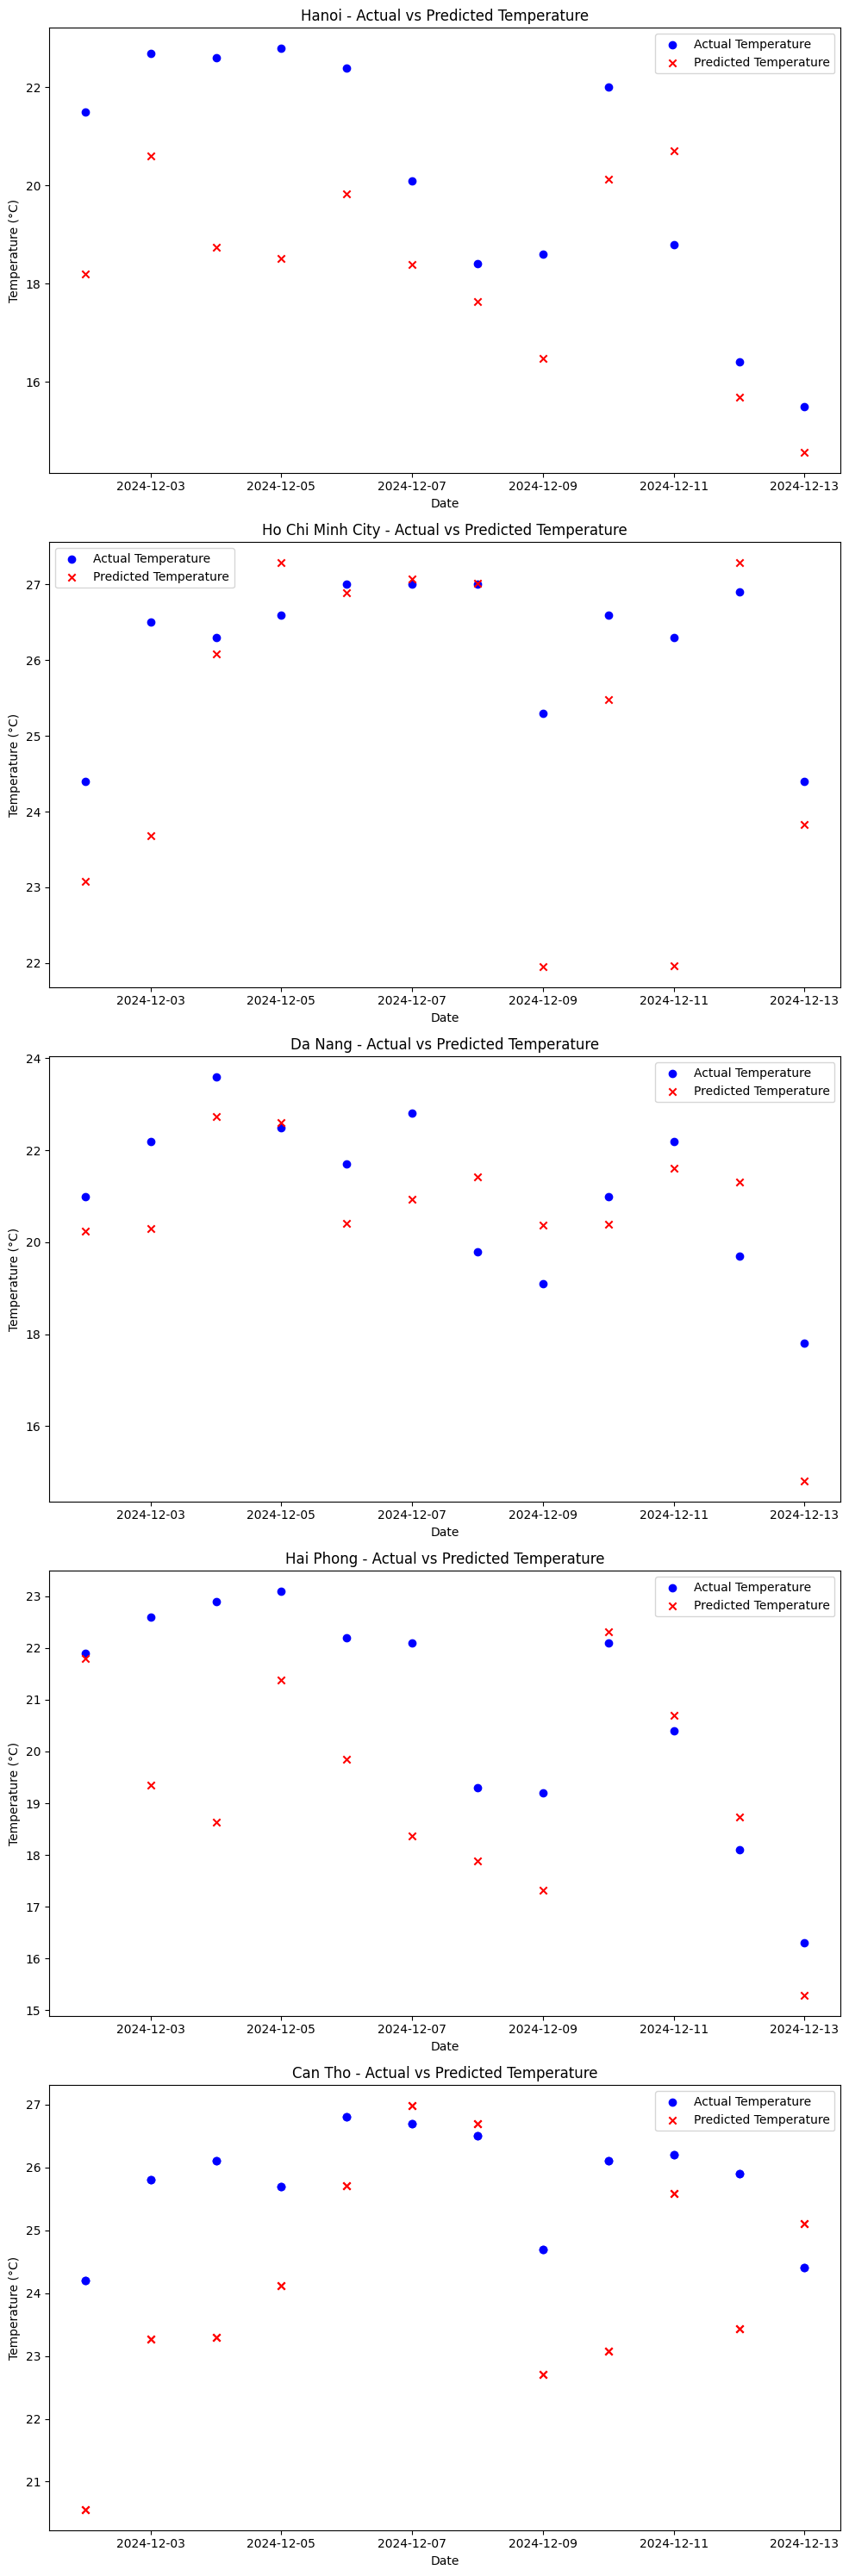

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Bước 1: Lọc dữ liệu sau ngày 1/12/2024 từ tập test
city_names = ["Hanoi", "Ho Chi Minh City", "Da Nang", "Hai Phong", "Can Tho"]

# Lọc các thành phố và ngày sau 1/12/2024
weather_df['date'] = pd.to_datetime(weather_df['date'])  # Đảm bảo cột 'date' là kiểu datetime
filtered_weather_df = weather_df[(weather_df['city'].isin(city_names)) & (weather_df['date'] > '2024-12-01')]

# Bước 2: Dự đoán nhiệt độ sử dụng model đã huấn luyện
# Loại bỏ các cột không cần thiết để chuẩn bị dữ liệu đầu vào
X_cities = filtered_weather_df.drop(columns=['temp', 'city', 'date'])

# Dự đoán nhiệt độ cho tất cả các thành phố
y_pred_cities = model.predict(X_cities)

# Bước 3: Lấy nhiệt độ thực tế từ dữ liệu đã lọc
y_actual_cities = filtered_weather_df['temp'].values

# Bước 4: Tạo 5 biểu đồ riêng biệt cho từng thành phố
fig, axs = plt.subplots(5, 1, figsize=(10, 30))  # Tạo 5 biểu đồ con (subplots)

# Lặp qua từng thành phố để vẽ biểu đồ
for i, city in enumerate(city_names):
    city_data = filtered_weather_df[filtered_weather_df['city'] == city]
    city_actual = city_data['temp'].values
    city_pred = y_pred_cities[filtered_weather_df['city'] == city].flatten()  # Đảm bảo thành dạng 1D

    # Vẽ scatter plot cho nhiệt độ thực tế
    axs[i].scatter(city_data['date'], city_actual, color='blue', label='Actual Temperature', marker='o')
    # Vẽ scatter plot cho nhiệt độ dự đoán
    axs[i].scatter(city_data['date'], city_pred, color='red', label='Predicted Temperature', marker='x')

    axs[i].set_title(f'{city} - Actual vs Predicted Temperature')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Temperature (°C)')
    axs[i].legend()

# Hiển thị tất cả biểu đồ
plt.tight_layout()
plt.show()


In [ ]:
# Lưu weather_df vào file CSV
weather_df.to_csv('processed_weather_data.csv', index=False)


In [ ]:
# Lưu vào Google Drive
weather_df.to_csv('/content/drive/MyDrive/processed_weather_data.csv', index=False)
